<a href="https://colab.research.google.com/github/Electromensch/nlp_need/blob/main/Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.19.5
!pip install pandas==1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_pickle('/content/drive/MyDrive/mypickle3')

In [5]:
df.head()

,sentences,text,ner,tokens,tags,ner_new,ner_final
0,"Вот принесли эти задания в колледж, надо решит...",Tesak,"[(Вот, O), (принесли, O), (эти, O), (задания, ...","[Вот, принесли, эти, задания, в, колледж, ,, н...","[(Вот, PRCL), (принесли, VERB), (эти, ADJF), (...","[(Вот, O), (принесли, O), (эти, O), (задания, ...",[]
1,"Когда-то у меня по химии была пятерка, а я по ...",Tesak,"[(Когда-то, O), (у, O), (меня, O), (по, O), (х...","[Когда-то, у, меня, по, химии, была, пятерка, ...","[(Когда-то, ADVB), (у, PREP), (меня, NPRO), (п...","[(Когда-то, O), (у, O), (меня, O), (по, O), (х...",[]
2,"На зоне не нужно больше знать и уметь, кроме с...",Tesak,"[(На, O), (зоне, O), (не, O), (нужно, O), (бол...","[На, зоне, не, нужно, больше, знать, и, уметь,...","[(На, PREP), (зоне, NOUN), (не, PRCL), (нужно,...","[(На, O), (зоне, O), (не, O), (нужно, O), (бол...",[]
3,"Только я сказал, сразу меня начали просить по...",Tesak,"[(Только, O), (я, O), (сказал, O), (,, O), (ср...","[Только, я, сказал, ,, сразу, меня, начали, пр...","[(Только, PRCL), (я, NPRO), (сказал, VERB), (,...","[(Только, O), (я, O), (сказал, O), (,, O), (ср...",[]
4,"Мы садимся, я открываю эти задачи и понимаю, ч...",Tesak,"[(Мы, O), (садимся, O), (,, O), (я, O), (откры...","[Мы, садимся, ,, я, открываю, эти, задачи, и, ...","[(Мы, NPRO), (садимся, VERB), (,, None), (я, N...","[(Мы, O), (садимся, O), (,, O), (я, O), (откры...",[]


In [6]:
tesak_lst = []
for i in df.ner_final[df['text']=='Tesak']:
  for j in i:
    tesak_lst.append(j)

In [7]:
tesak_tags = []
for i in df.tags[df['text']=='Tesak']:
  for j in i:
    if j[0].isalnum():
      tesak_tags.append((j[0], str(j[1])))

In [8]:
tesak_df = pd.DataFrame(tesak_lst, columns=['word', 'tag'])

In [9]:
tesak_tag_df = pd.DataFrame(tesak_tags, columns=['word', 'ps'])

In [36]:
tesak_tag_df.ps[0]

'PRCL'

In [10]:
word_lst = tesak_df.word.value_counts().head(20).index

In [11]:
word_lst_per = tesak_df.word[tesak_df.tag == 'PER'].value_counts().head(20).index
word_lst_org = tesak_df.word[tesak_df.tag == 'ORG'].value_counts().head(20).index
word_lst_loc = tesak_df.word[tesak_df.tag == 'LOC'].value_counts().head(20).index

In [12]:
tesak_df.word[tesak_df.tag == 'PER'].value_counts().head(20).index

Index(['Макс', 'Максим', 'Блин', 'Ладно', 'Олег', 'Тесак', 'Глеб', 'Леха',
       'Федор', 'Гошан', 'Хрен', 'Саша', 'Юнфэй', 'Марцинкевич', 'Вадим',
       'Андрюха', 'Михалыч', 'Саня', 'Евгений Олегович', 'Давай'],
      dtype='object')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

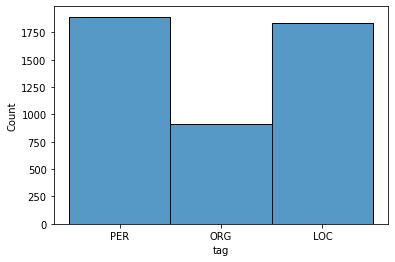

In [ ]:
sns.histplot(tesak_df, x='tag')

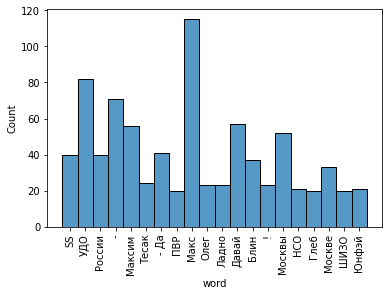

In [ ]:
g = sns.histplot(tesak_df[tesak_df.word.isin(word_lst)], x='word')
g= plt.xticks(rotation=90)

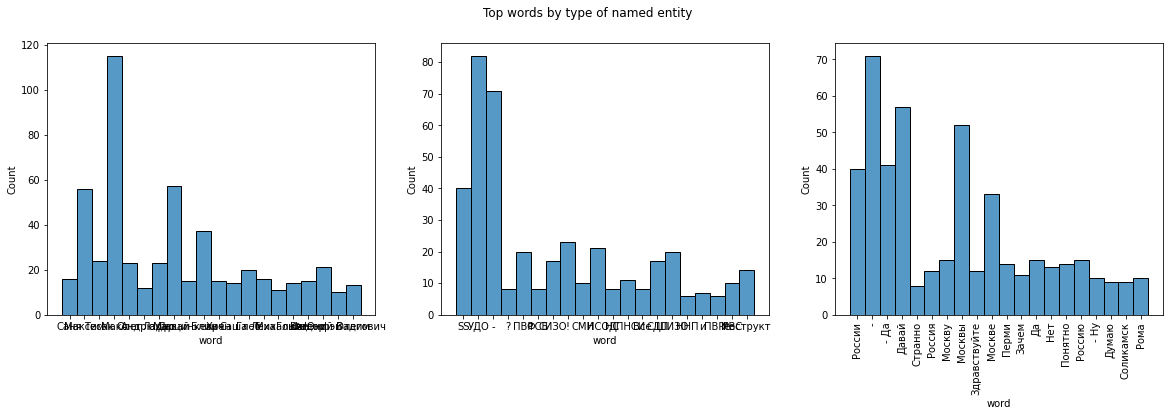

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
fig.suptitle('Top words by type of named entity')
g = sns.histplot(tesak_df[tesak_df.word.isin(word_lst_per)], x='word', ax=axs[0])

f = sns.histplot(tesak_df[tesak_df.word.isin(word_lst_org)], x='word', ax=axs[1])

d = sns.histplot(tesak_df[tesak_df.word.isin(word_lst_loc)], x='word', ax=axs[2])
axs= plt.xticks(rotation=90)

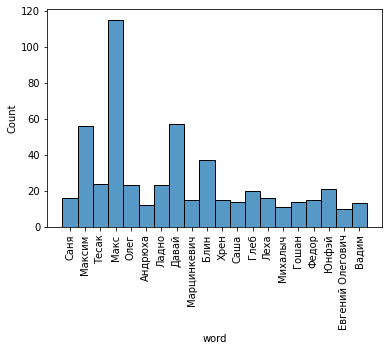

In [ ]:
g = sns.histplot(tesak_df[tesak_df.word.isin(word_lst_per)], x='word')
g= plt.xticks(rotation=90)

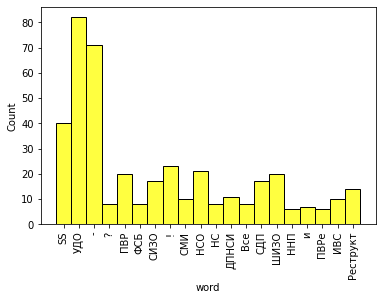

In [ ]:
g = sns.histplot(tesak_df[tesak_df.word.isin(word_lst_org)], x='word', color='yellow')
g= plt.xticks(rotation=90)

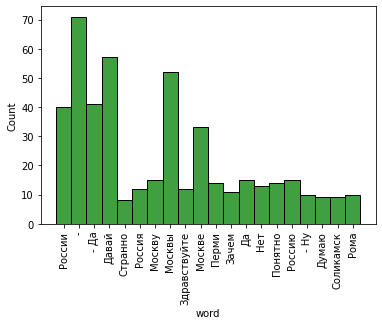

In [ ]:
g = sns.histplot(tesak_df[tesak_df.word.isin(word_lst_loc)], x='word', color='green')
g= plt.xticks(rotation=90)

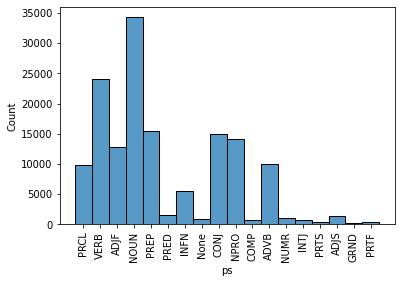

In [ ]:
sns.histplot(tesak_tag_df, x='ps')
g= plt.xticks(rotation=90)

In [38]:
word_lst_noun = tesak_tag_df.word[tesak_tag_df.ps == 'NOUN'].value_counts().head(20).index
word_lst_verb = tesak_tag_df.word[tesak_tag_df.ps == 'VERB'].value_counts().head(20).index
word_lst_advb = tesak_tag_df.word[tesak_tag_df.ps == 'ADVB'].value_counts().head(20).index
word_lst_adjf = tesak_tag_df.word[tesak_tag_df.ps == 'ADJF'].value_counts().head(20).index

In [39]:
word_lst_verb

Index(['было', 'был', 'будет', 'может', 'говорит', 'знаю', 'сидит', 'были',
       'была', 'Давай', 'буду', 'говорю', 'стоит', 'будешь', 'сказал', 'Может',
       'давай', 'думаю', 'будут', 'понял'],
      dtype='object')

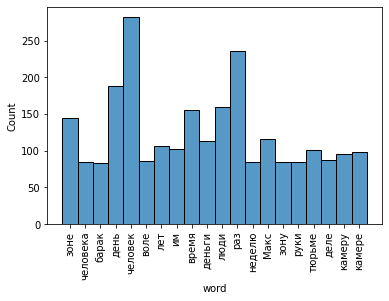

In [40]:
sns.histplot(tesak_tag_df[tesak_tag_df.word.isin(word_lst_noun)], x='word')
g= plt.xticks(rotation=90)

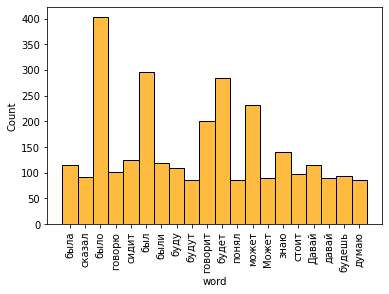

In [41]:
sns.histplot(tesak_tag_df[tesak_tag_df.word.isin(word_lst_verb)], x='word', color='orange')
g= plt.xticks(rotation=90)

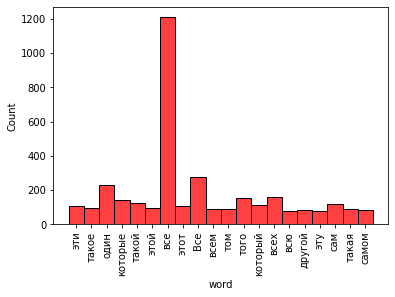

In [42]:
sns.histplot(tesak_tag_df[tesak_tag_df.word.isin(word_lst_adjf)], x='word', color='red')
g= plt.xticks(rotation=90)

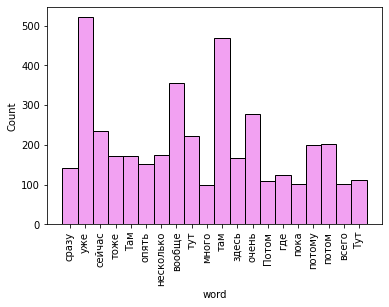

In [43]:
sns.histplot(tesak_tag_df[tesak_tag_df.word.isin(word_lst_advb)], x='word', color='violet')
g= plt.xticks(rotation=90)

In [14]:
koran_lst = []
for i in df.ner_final[df['text']=='Koran']:
  for j in i:
    koran_lst.append(j)

In [56]:
koran_tags = []
for i in df.tags[df['text']=='Koran']:
  for j in i:
    if j[0].isalnum():
      koran_tags.append((j[0], str(j[1])))

In [57]:
koran_df = pd.DataFrame(koran_lst, columns=['word', 'tag'])

In [59]:
koran_tag_df = pd.DataFrame(koran_tags, columns=['word', 'ps'])

In [ ]:
koran_tag_df 

In [18]:
word_lst_per2 = koran_df.word[koran_df.tag == 'PER'].value_counts().head(20).index
word_lst_org2 = koran_df.word[koran_df.tag == 'ORG'].value_counts().head(20).index
word_lst_loc2 = koran_df.word[koran_df.tag == 'LOC'].value_counts().head(20).index

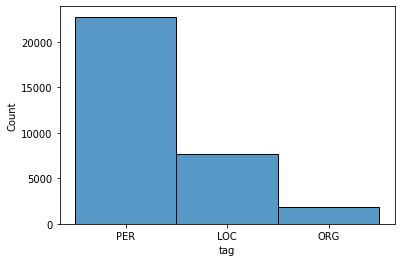

In [ ]:
sns.histplot(koran_df, x='tag')

In [ ]:
word_lst2 = koran_df.word.value_counts().head(20).index

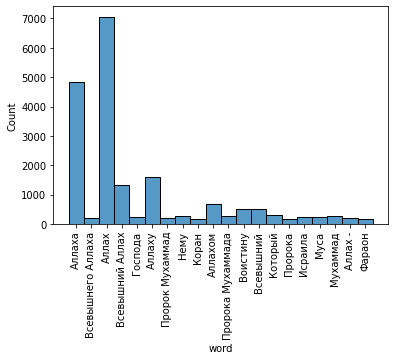

In [ ]:
g = sns.histplot(koran_df[koran_df.word.isin(word_lst2)], x='word')
g= plt.xticks(rotation=90)

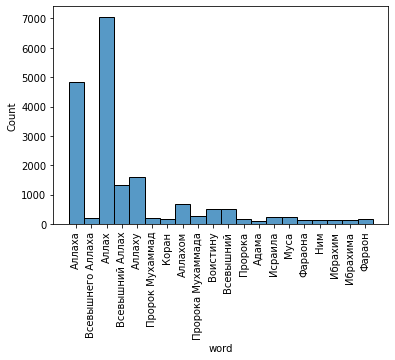

In [ ]:
g = sns.histplot(koran_df[koran_df.word.isin(word_lst_per2)], x='word')
g= plt.xticks(rotation=90)

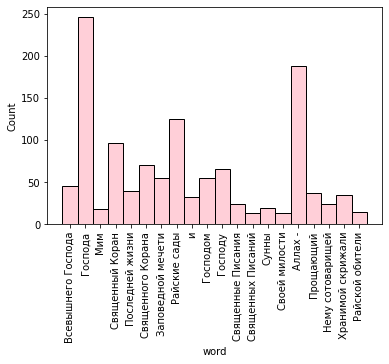

In [ ]:
g = sns.histplot(koran_df[koran_df.word.isin(word_lst_org2)], x='word', color='pink')
g= plt.xticks(rotation=90)

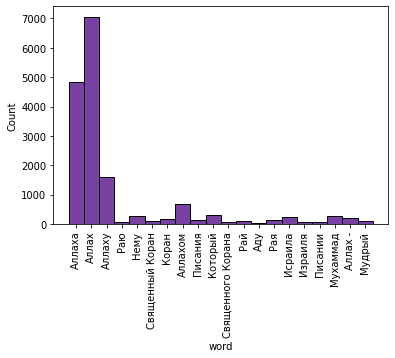

In [ ]:
g = sns.histplot(koran_df[koran_df.word.isin(word_lst_loc2)], x='word', color='indigo')
g= plt.xticks(rotation=90)

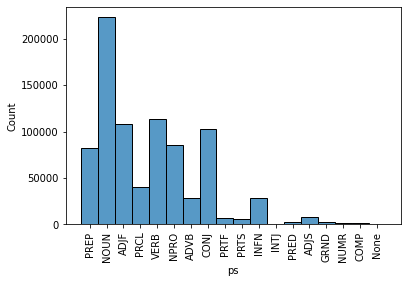

In [61]:
sns.histplot(koran_tag_df, x='ps')
g= plt.xticks(rotation=90)

In [62]:
word_lst_noun2 = koran_tag_df.word[koran_tag_df.ps == 'NOUN'].value_counts().head(20).index
word_lst_verb2 = koran_tag_df.word[koran_tag_df.ps == 'VERB'].value_counts().head(20).index
word_lst_advb2 = koran_tag_df.word[koran_tag_df.ps == 'ADVB'].value_counts().head(20).index
word_lst_adjf2 = koran_tag_df.word[koran_tag_df.ps == 'ADJF'].value_counts().head(20).index

In [63]:
word_lst_noun2

Index(['Аллах', 'Аллаха', 'им', 'Всевышний', 'людей', 'Аллаху', 'люди',
       'человек', 'Господа', 'жизни', 'путь', 'земле', 'людям', 'Господь',
       'деяния', 'рабов', 'Аллахом', 'истину', 'пользу', 'день'],
      dtype='object')

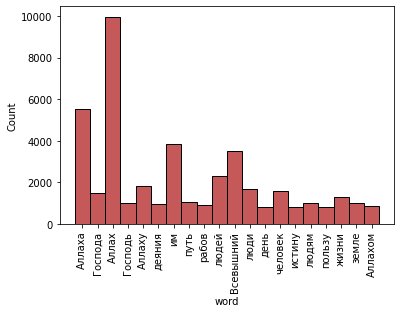

In [64]:
sns.histplot(koran_tag_df[koran_tag_df.word.isin(word_lst_noun2)], x='word', color='firebrick')
g= plt.xticks(rotation=90)

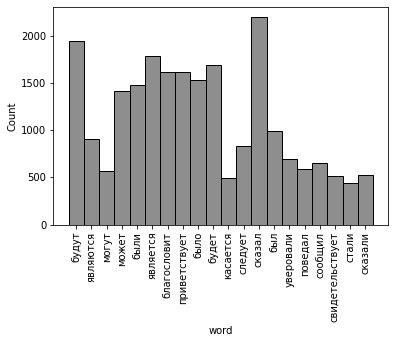

In [65]:
sns.histplot(koran_tag_df[koran_tag_df.word.isin(word_lst_verb2)], x='word', color='dimgrey')
g= plt.xticks(rotation=90)

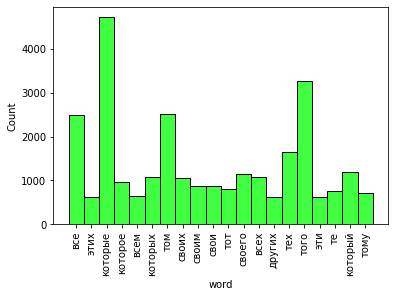

In [68]:
sns.histplot(koran_tag_df[koran_tag_df.word.isin(word_lst_adjf2)], x='word', color='lime')
g= plt.xticks(rotation=90)

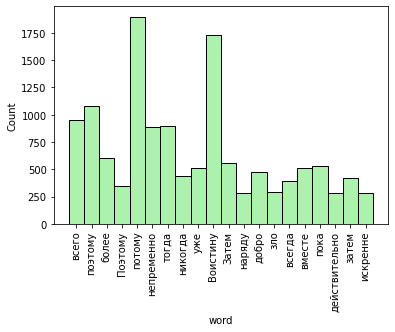

In [67]:
sns.histplot(koran_tag_df[koran_tag_df.word.isin(word_lst_advb2)], x='word', color='lightgreen')
g= plt.xticks(rotation=90)